## 커널 서포트 벡터 머신 SVM
- 분류용 선형 모델에서 선형 서포트 벡터 머신을 사용해 보았음(chap03 Linear SVC)  
- SVM은 입력 데이터에서 단순한 초평면으로 정의되지 않는 더 복잡한 모델을 만들 수 있도록 확장한 것  
- SVM은 분류와 회귀에 모두 사용할 수 있음, 분류 문제에 적용하는 사례를 살펴봄 

### 선형 모델과 비선형 특성
- 저차원 데이터셋에서는 선형 모델이 매우 제한적임  
- 선형 모델을 유연하게 만드는 한 가지 방법은 feature끼리 곱하거나 feature를 거듭제곱하는 식으로 새로운 feature를 추가하는 것임(feature engineering)  
- 이전의 트리의 feature 중요도에서 살펴본 데이터셋을 다시 보면

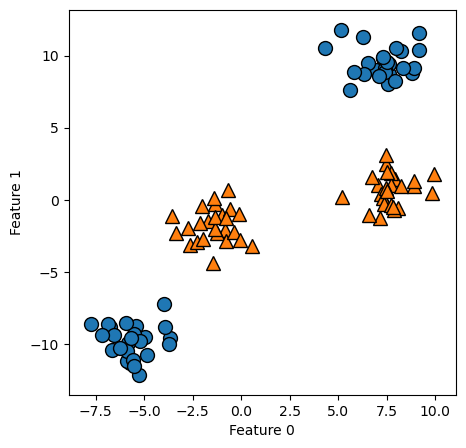

In [16]:
# SVM 분류 문제에 적용

import mglearn
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt

X, y = make_blobs(centers=4, random_state=8)
y = y % 2

plt.figure(figsize=(5,5))
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

- 분류를 위한 선형 모델은 직선으로만 데이터 포인트를 나눌 수 있어서 이런 데이터셋에는 잘 들어맞지 않음

In [2]:
from sklearn.svm import LinearSVC

linear_svm = LinearSVC(max_iter=10000).fit(X, y)
print("계수 배열의 크기: ", linear_svm.coef_.shape)
print("절편 배열의 크기: ", linear_svm.intercept_.shape)

계수 배열의 크기:  (1, 2)
절편 배열의 크기:  (1,)


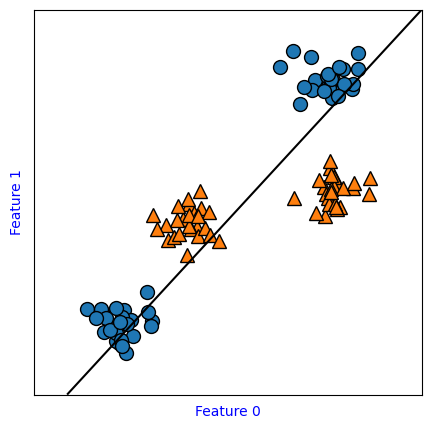

In [3]:
linear_svm = LinearSVC(max_iter=10000).fit(X, y)

fig = plt.figure(figsize=(5,5))
ax = fig.add_subplot(111)
mglearn.plots.plot_2d_separator(linear_svm, X)
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
ax.set_xlabel('Feature 0')
ax.set_ylabel('Feature 1')
ax.xaxis.label.set_color('blue')
ax.yaxis.label.set_color('blue')
plt.show()

- 두 번째 feature를 제곱한 feature 1 ** 2 를 새로운 feature로 추가해 입력 feature를 확장해 보자  
- 이제 feature 0, feature 1 의 2차원 데이터 포인트가 아니라 3차원 데이터 포인트로 표현됨

In [4]:
# 선형 모델을 유연하게 만들기 (feature engineering)

import numpy as np

X_new = np.hstack([X, X[:, 1:] ** 2])

from mpl_toolkits.mplot3d import Axes3D, axes3d

figure = plt.figure(figsize=(10,10))
# 3차원 그래프
ax = Axes3D(figure, elev=-152, azim=-26)
# y == 0 인 포인트를 먼저 그리고 그 다음 y == 1 인 포인트를 그립니다
mask = y == 0
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=200, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=200, edgecolor='k')
ax.set_xlabel("feature0")
ax.set_ylabel("feature")
ax.set_zlabel("feature1 ** 2")
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_11428\3165930935.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=200, edgecolor='k')
C:\Users\BIT\AppData\Local\Temp\ipykernel_11428\3165930935.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=200, edgecolor='k')


<Figure size 1000x1000 with 0 Axes>

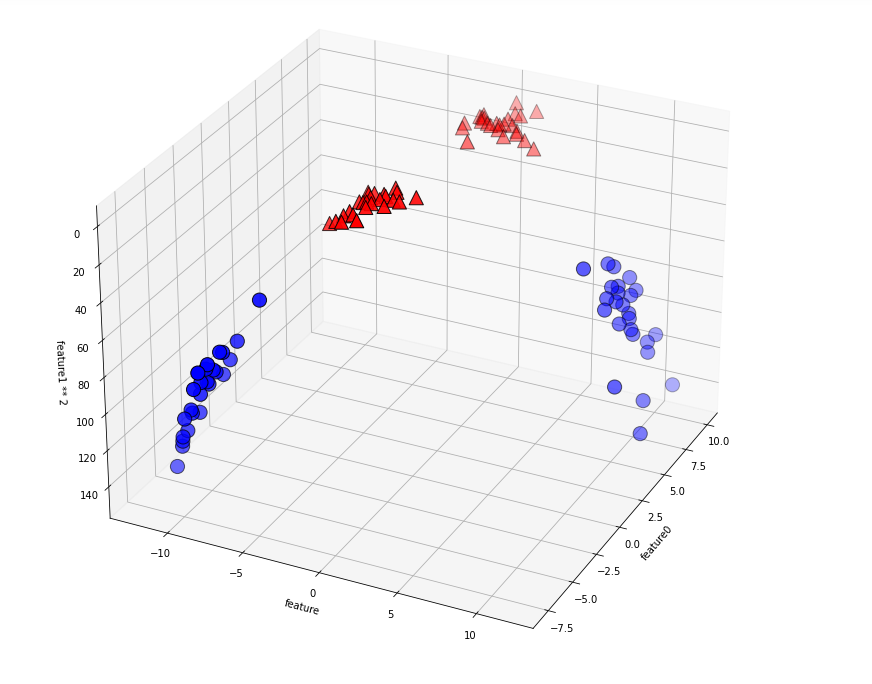

In [5]:
linear_svm_3d = LinearSVC(max_iter=5000).fit(X_new, y)
coef, intercept = linear_svm_3d.coef_.ravel(), linear_svm_3d.intercept_

# 선형 결정 경계 그리기
figure = plt.figure(figsize=(10,10))
ax = Axes3D(figure, elev=-152, azim=-26)
xx = np.linspace(X_new[:, 0].min() - 2, X_new[:, 0].max() + 2, 50)
yy = np.linspace(X_new[:, 1].min() - 2, X_new[:, 1].max() + 2, 50)

XX, YY = np.meshgrid(xx, yy)
ZZ = (coef[0] * XX + coef[1] * YY + intercept) / -coef[2]
ax.plot_surface(XX, YY, ZZ, rstride=8, cstride=8, alpha=0.3)
ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=200, edgecolor='k')
ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=200, edgecolor='k')

ax.set_xlabel("feature0")
ax.set_ylabel("feature")
ax.set_zlabel("feature1 ** 2")
plt.show()

C:\Users\BIT\AppData\Local\Temp\ipykernel_11428\1623966110.py:13: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[mask, 0], X_new[mask, 1], X_new[mask, 2], c='b', cmap=mglearn.cm2, s=200, edgecolor='k')
C:\Users\BIT\AppData\Local\Temp\ipykernel_11428\1623966110.py:14: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(X_new[~mask, 0], X_new[~mask, 1], X_new[~mask, 2], c='r', marker='^', cmap=mglearn.cm2, s=200, edgecolor='k')


<Figure size 1000x1000 with 0 Axes>

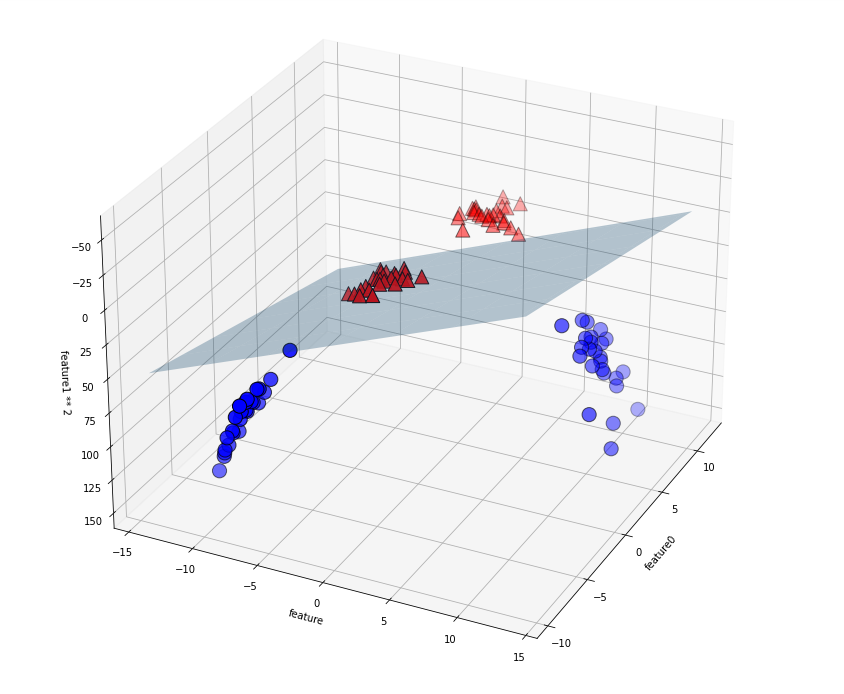

- 위 그림을 원래 특성(feature 2개)으로 투영해보면 이 선형 SVM 모델은 더 이상 선형이 아님  
- 직선보다 타원에 가까운 모습을 확인할 수 있음

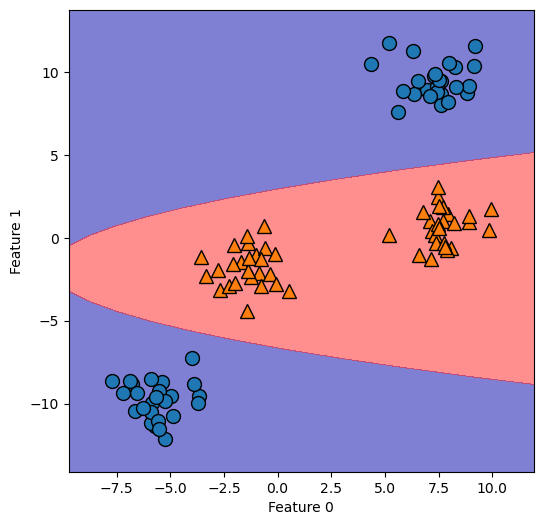

In [6]:
ZZ = YY ** 2
dec = linear_svm_3d.decision_function(np.c_[XX.ravel(), YY.ravel(), ZZ.ravel()])
plt.figure(figsize=(6,6))
plt.contourf(XX, YY, dec.reshape(XX.shape), levels=[dec.min(), 0, dec.max()], cmap=mglearn.cm2, alpha=0.5)

mglearn.discrete_scatter(X[:, 0], X[:, 1], y)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### 커널 기법 (kernel trick)
- 데이터셋에 비선형 특성을 추가하여 선형 모델을 강력하게 만들어 봤음  
- 많은 경우 어떤 특성을 추가해야할지 모르고 특성을 많이 추가하면 연산 비용이 커짐  
- **커널 기법(kernel trick) : 수학적 기법을 사용하여 새로운 특성을 많이 만들지 않고 고차원에서 분류기를 학습시킬 수 있음** 
- 실제로 데이터를 확장하지 않고 확장된 특성에 대한 데이터 포인트들의 거리를 계산함  
- SVM에서 데이터를 고차원 공간에 매핑하는데 많이 사용하는 방법은 두 가지  
  1. 다항식 커널 : 원래 특성의 가능한 조합을 지정된 차수까지 모두 계산  
  2. 가우시안 커널 (RBF(Radial Basis Function) 커널) 
- 가우시안 커널은 차원이 무한한 특성 공간에 매핑하는 것으로, 설명 및 이해하기 힘듬  
- RBF 커널을 사용한 SVM이 결정을 만드는 방법은 비교적 쉽게 요약할 수 있음

### SVM 이해하기
- 학습이 진행되는 동안 SVM은 각 훈련 데이터 포인트가 두 클래스 사이의 결정 경계를 구분하는 데 얼마나 중요한지를 배우게 됨  
- 일반적으로 훈련 데이터의 일부만 결정 경계를 만드는데 영향을 줌, 바로 두 클래스 사이의 경계에 위치한 데이터 포인트임  
- 이런 데이터 포인트를 서포트 벡터(support vector) 라 하며, 여기서 서포트 벡터 머신이란 이름이 유래  
- 새로운 데이터 포인트에 대해 예측하려면 각 서포트 벡터와의 거리를 측정함  
- 분류 결정은 서포트 벡터까지의 거리에 기반하며 서포트 벡터의 중요도는 훈련 과정에서 학습함(SVC 객체의 dual_coef_ 속성에 저장됨)  
- 데이터 포인트 사이의 거리는 가우시안 커널에 의해 계산됨  
- k<sub>rbf</sub> (x<sub>1</sub>, x<sub>2</sub>) = exp(-$\gamma$ || x<sub>1</sub> - x<sub>2</sub> ||<sup>2</sup>)  
- 여기서 x<sub>1</sub> 과 x<sub>2</sub> 는 데이터 포인트이며 || x<sub>1</sub> - x<sub>2</sub> ||<sup>2</sup> 는 유클리디안 거리이고, $\gamma$ 는 가우시안 커널의 폭을 제어하는 매개변수  
- 다음은 두 개의 클래스를 가진 2차원 데이터셋에 서포트 벡터 머신을 학습시킨 결과를 보여줌  
- 결정 경계는 검은 실선으로, 서포트 벡터는 굵은 테두리로 크게 그렸음  
- forge 데이터셋에 SVM을 학습시켜 그래프를 그림

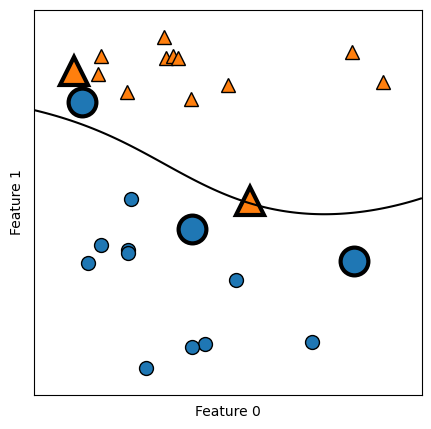

In [17]:
# SVM 학습시키기

from sklearn.svm import SVC

X, y = mglearn.tools.make_handcrafted_dataset()
plt.figure(figsize=(5,5))
svm = SVC(kernel='rbf', C=10, gamma=0.1).fit(X, y)
mglearn.plots.plot_2d_separator(svm, X, eps=.5)

# 데이터 포인트 그리기
mglearn.discrete_scatter(X[:, 0], X[:, 1], y)

# 서포트 벡터
sv = svm.support_vectors_

# dual_coef_ 의 부호에 의해 서포트 벡터의 클래스 레이블이 결정됩니다
sv_labels = svm.dual_coef_.ravel() > 0

mglearn.discrete_scatter(sv[:, 0], sv[:, 1], sv_labels, s=20, markeredgewidth=3)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")
plt.show()

### SVM 매개변수 튜닝
- gamma 매개변수는 앞의 공식에 나와 있는 $\gamma$ 로 가우시안 커널 폭의 역수에 해당  
- gamma 매개변수가 하나의 훈련 샘플이 미치는 영향의 범위를 결정  
- 작은 값은 넓은 영역을 뜻하며 큰 값이라면 영향이 미치는 범위가 제한적  
- 즉, 가우시안 커널의 반경이 클수록 훈련 샘플의 영향 범위도 커짐  
- C 매개변수는 선형 모델에서 사용한 것과 비슷한 규제 매개변수  
- 이 매개변수는 각 포인트의 중요도(정확히는 dual_coef_ 값)를 제한함  
- 이 매개변수를 다르게 했을 때 어떻게 변경되는지 다음을 봄

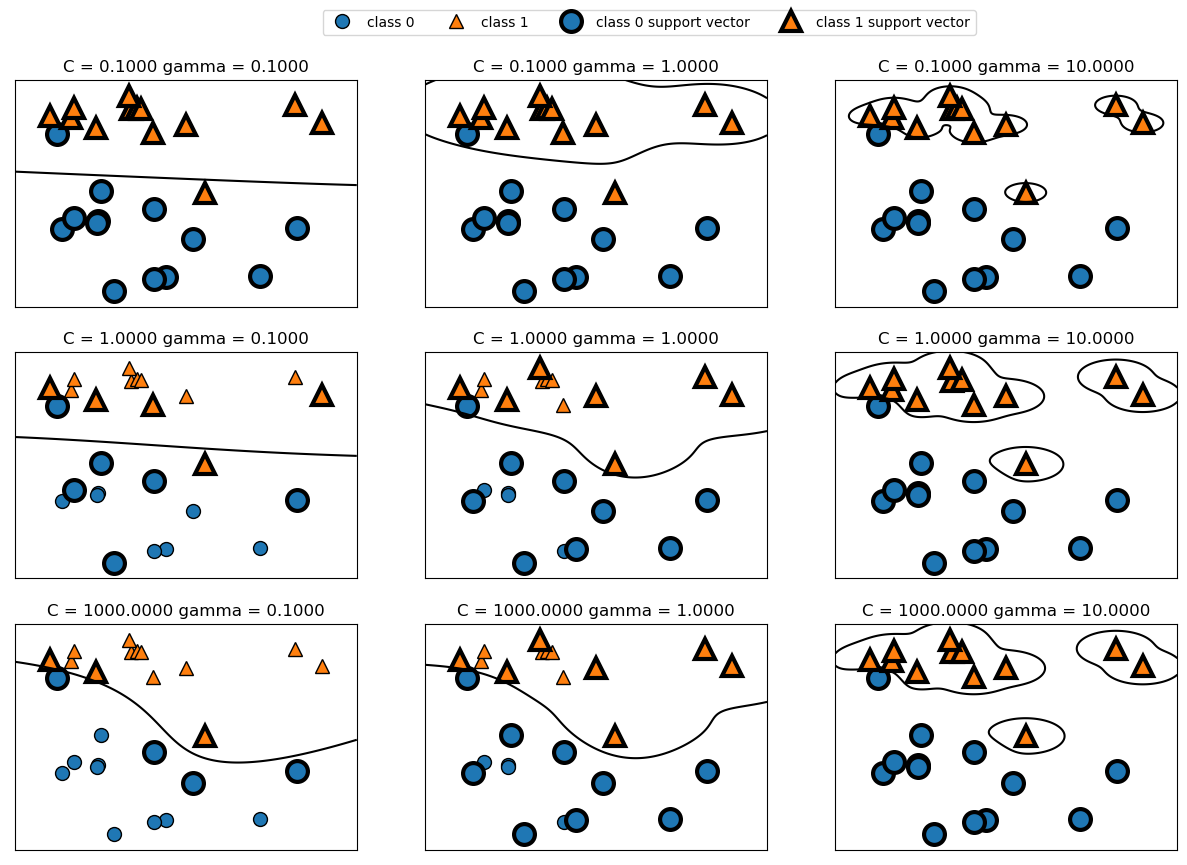

In [8]:
fig, axes = plt.subplots(3, 3, figsize=(15, 10))

for ax, C in zip(axes, [-1, 0, 3]):
    for a, gamma in zip(ax, range(-1, 2)):
        mglearn.plots.plot_svm(log_C=C, log_gamma=gamma, ax=a)
        
axes[0, 0].legend(["class 0", "class 1", "class 0 support vector", "class 1 support vector"],
                  ncol=4, loc=(.9, 1.2))
plt.show()

- 왼쪽에서 오른쪽으로 가면서 gamma 매개변수를 0.1 에서 10으로 증가  
- 작은 gamma 값은 가우시안 커널의 반경을 크게 하여 많은 포인트들이 가까이 있는 것으로 고려됨  
- 그래서 왼쪽 그림의 결정 경계는 매우 부드럽고 오른쪽으로 갈수록 결정 경계는 하나의 포인트에 더 민감해짐  
- 작은 gamma 값이 결정 경계를 천천히 바뀌게 하므로 모델의 복잡도를 낮춤, 반면에 큰 gamma 값은 더 복잡한 모델을 만듬  
- 위에서 아래로는 C 매개변수를 0.1 에서 1000 으로 증가시켰음  
- 선형 모델에서처럼 작은 C는 매우 제약이 큰 모델을 만들고 각 데이터 포인트의 영향력이 작음  
- 왼쪽 위의 결정 경계는 거의 선형에 가까우며 잘못 분류된 데이터 포인트가 경계에 거의 영향을 주지 않음  
- 왼쪽 아래에서 볼 수 있듯이 C를 증가시키면 이 포인트들이 모델에 큰 영향을 주며 결정 경계를 휘게해서 정확하게 분류함  
- RBF 커널 SVM을 유방암 데이터셋에 적용해 보겠음, 기본값 C=1, gamma=1/n_feature 를 사용함  

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer

cancer = load_breast_cancer()

X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, random_state=0)

svc = SVC()
svc.fit(X_train, y_train)

print("훈련 세트 정확도: {:.2f}".format(svc.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(svc.score(X_test, y_test)))

훈련 세트 정확도: 0.90
테스트 세트 정확도: 0.94


- 입력 특성의 스케일이 매우 다양해서 이 부분을 조정하면 더 좋은 결과를 기대할 수 있음  
- 각 특성의 최솟값과 최댓값을 로그 스케일로 나타내 보면

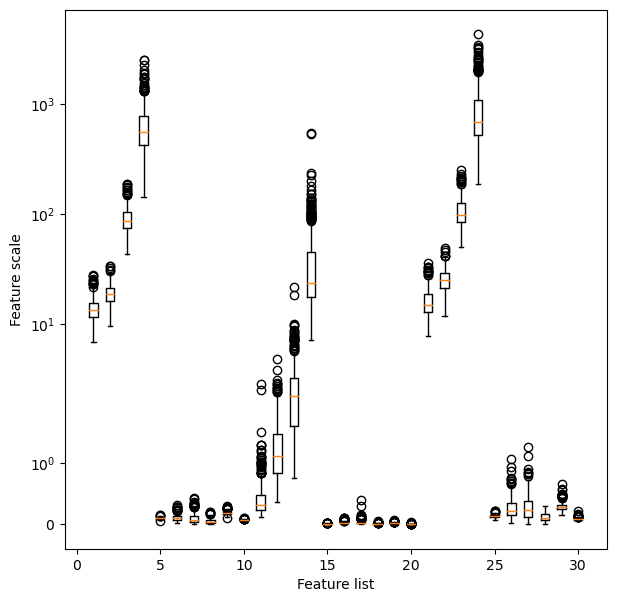

In [10]:
plt.figure(figsize=(7,7))
plt.boxplot(X_train, manage_ticks=False)
plt.yscale("symlog")
plt.xlabel("Feature list")
plt.ylabel("Feature scale")
plt.show()

### SVM을 위한 데이터 전처리
- 이 문제를 해결하는 방법 하나는 특성 값의 범위가 비슷해지도록 조정하는 것  
- 커널 SVM에서는 모든 특성 값을 평균이 0 이고 단위 분산이 되도록 하거나, 0과 1 사이로 맞추는 방법을 많이 사용  
- 직접 변환해보겠음(MinMaxScaling)   
   * training set xi' = (xi-min) / (max-min)
   * test set test xi' = (test xi-min) / (max-min)

In [18]:
# 훈련 세트에서 특성별 최솟값 계산
min_on_training = X_train.min(axis=0)
# 훈련 세트에서 특성별 (최댓값 - 최솟값) 범위 계산
range_on_training = (X_train - min_on_training).max(axis=0)

# 훈련 데이터에 최솟값을 빼고 범위로 나누면
# 각 특성에 대해 최솟값은 0 최댓값은 1 임
X_train_scaled = (X_train - min_on_training) / range_on_training
print("Feature min\n", X_train_scaled.min(axis=0))
print("Feature max\n", X_train_scaled.max(axis=0))

Feature min
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]
Feature max
 [1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1.]


In [12]:
X_test_scaled = (X_test - min_on_training) / range_on_training

- testset과 trainingset의 기준을 동일하게 하기 위해 range_on_training, min_on_training 사용

In [13]:
print(X_test_scaled)

[[0.30380046 0.44854772 0.30993021 ... 0.70651051 0.39818648 0.36639118]
 [0.29480808 0.64481328 0.27855711 ... 0.20685498 0.17327025 0.08421881]
 [0.33314402 0.24688797 0.31649506 ... 0.28301757 0.11255667 0.07910272]
 ...
 [0.25363245 0.10622407 0.24289959 ... 0.36858422 0.30455352 0.13695396]
 [0.30995314 0.05103734 0.30488563 ... 0.25514984 0.22570471 0.11065197]
 [0.59676274 0.35020747 0.60058047 ... 0.77402687 0.40961955 0.24393283]]


In [14]:
svc = SVC()
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.984
테스트 세트 정확도: 0.972


In [19]:
# C 증가 - 규제 완화

svc = SVC(C=20)
svc.fit(X_train_scaled, y_train)

print("훈련 세트 정확도: {:.3f}".format(svc.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.3f}".format(svc.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.988
테스트 세트 정확도: 0.979


### 커널 서포트 벡터 머신 장단점
- 커널 서포트 벡터 머신은 강력한 모델이며 다양한 데이터셋에서 잘 작동함  
- SVM은 데이터의 특성이 몇 개 안되더라도 복잡한 결정 경계를 만들 수 있음  
- 저차원과 고차원의 데이터에 모두 잘 작동하지만 샘플이 많을 때는 잘 맞지 않음  
- SVM의 또 하나의 단점은 데이터 전처리와 매개변수 설정에 신경을 많이 써야 함  
- 그래서 요즘엔 전처리가 거의 필요없는 랜덤 포레스트나 그레이디언트 부스팅 같은 트리 기반 모델을 많이 사용  
- SVM 모델은 분석하기도 어려움, 예측이 어떻게 결정되었는지 이해하기 어렵고 비전문가에게 모델을 설명하기가 난해함

- 선형 모델의 주요 매개변수 - 회귀 모델에서는 alpha   
- 분류용 선형 모델의 주요 매개변수 - LinearSVC와 LogisticRegression에서는 C   
- 비선형 모델의 주요 매개변수 - SVM에서는 gamma   
|
- **높은 alpha / 낮은 C / 낮은 gamma**   
  강한 규제, |coef_| 0에 근접, 모델 복잡도 감소, 훈련세트 성능 저하, 일반화 도움   
  가우시안 커널의 반경 증가(포인트에 민감)   
  |
- **낮은 alpha / 높은 C / 높은 gamma**   
  약한 규제, |coef_| 커짐, 모델 복잡도 증가, 훈련 세트와 테스트 세트 성능 증가, overfitting으로 이동하는 경향 보임   
  가우시안 커널의 반경 감소(부드러운 결정 경계)